In [9]:
# [satomacoto: Pythonでカルマンフィルタを実装してみる](https://satomacoto.blogspot.jp/2011/06/python.html)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

def lkf(T, Y, U, mu0, Sigma0, A, B, C, Q, R):
    '''Linear Kalman Filter
    
    - 状態方程式
        x = A * x_ + B * u + w, w ~ N(0, Q)
    - 観測方程式
        y = C * x + v, v ~ N(0, R)
    
    Parameters
    ==========
    - T: ステップ数
    - Y: 観測列
    - U: 入力列
    - mu0: 初期状態推定値
    - Sigma0: 初期誤差共分散行列
    - A, B, C, Q, R: カルマンフィルタの係数
    
    Returns
    =======
    - M: 状態推定値列
    '''
    
    mu = mu0
    Sigma = Sigma0
    
    M = [mu]
    
    for i in range(T):
        # prediction
        mu_ = A * mu + B * U[i]
        Sigma_ = Q + A * Sigma * A.T
        
        # 更新
        yi = Y[i+1] - C * mu_
        S = C * Sigma_ * C.T + R
        K = Sigma_ * C.T * S.I
        mu = mu_ + K * yi
        Sigma = Sigma_ - K * C * Sigma_
        M.append(mu)
    
    return M

def main():
    
    A = np.mat([[1,0], [0,1]])
    B = np.mat([[1,0], [0,1]])
    Q = np.mat([[1,0], [0,1]])
    
    C = np.mat([[1,0], [0,1]])
    R = np.mat([[2,0], [0,2]])
    
    T = 10
    x = np.mat([[0], [0]])
    X = [x]
    Y = [x]
    u = np.mat([[2], [2]])
    U = [u]
    for i in range(T):
        x = A * x + B * u + np.random.multivariate_normal([0, 0], Q, 1).T
        X.append(x)
        y = C * x + np.random.multivariate_normal([0, 0], R, 1).T
        Y.append(y)
        U.append(u)
    
    mu0 = np.mat([[0], [0]])
    Sigma0 = np.mat([[0, 0], [0, 0]])
    M = lkf(T, Y, U, mu0, Sigma0, A, B, C, Q, R)
    
    plt.figure(figsize=(10,10))
    a, b = np.array(np.concatenate(X, axis=1))
    plt.plot(a, b, 'rs-')
    a, b = np.array(np.concatenate(Y, axis=1))
    plt.plot(a, b, 'g^-')
    a, b = np.array(np.concatenate(M, axis=1))
    plt.plot(a, b, 'bo-')
    plt.axis('equal')
    plt.show()

# if __name__ == '__main__':
#     main()

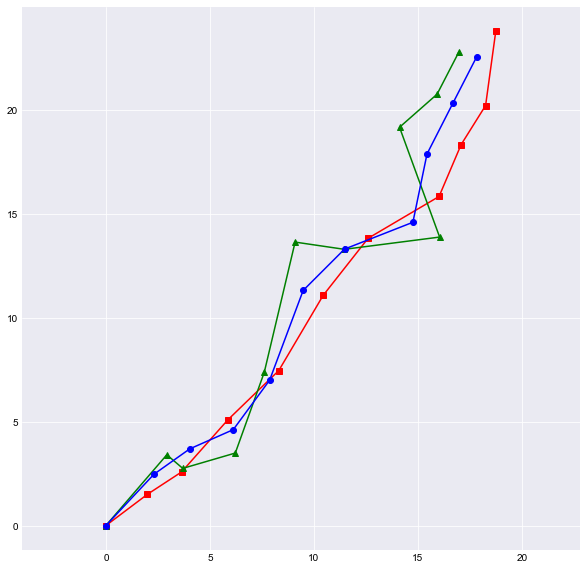

In [10]:
if __name__ == '__main__':
    main()

In [21]:
# [Python pandas の算術演算 / 集約関数 / 統計関数まとめ - StatsFragments](http://sinhrks.hatenablog.com/entry/2014/11/27/232150)

import numpy as np
import pandas as pd

df = pd.DataFrame({'C1': [1,1,1],
                   'C2': [1,1,1],
                   'C3': [1,1,1]
                  })

In [65]:
df + 1
df2 = df + np.array([[1,2,3], [2,3,4], [3,4,5]])
df['C1'] + np.array([1,2,3])
df2.iloc[2, 2] += 5
df2[['C1', 'C2']] -= 5
df2

,C1,C2,C3
0,-3,-2,4
1,-2,-1,5
2,-1,0,11


In [83]:
# 加重平均の例
import numpy as np
import pandas as pd

df = pd.DataFrame({'class A': [70, 20],
                   'class B': [90, 30]},
                   index=['point', 'importance'])

# weightedAverage = (20*70 + 30*90)/(20 + 30)
weightedAverage = (df['class A']['point'] * df['class A']['importance'] + df['class B']['point'] * df['class B']['importance'])/(df['class A']['importance'] + df['class B']['importance'])
weightedAverage 

82.0

In [87]:
# [pythonとhaskell, perl6で加重平均 - studies](http://studies.hatenablog.com/entry/2017/03/18/103909)
# 加重平均の例2

import numpy as np

weight = np.array([0.22, 0.14, 0.04, 0.12, 0.22, 0.26])
record = np.array([64, 51, 132, 24, 19, 11])

sum(weight * record)

36.420000000000002